In [2]:
import numpy as np
from numpy import linalg as la

In [3]:
v = np.array([15,34,18,22])
w = np.array([1,3,2,7])
print("Problem 1a")
vNorm = la.norm(v)
wNorm = la.norm(w)
print("\n ||v||: ",vNorm, "\n ||w||:", wNorm, "\n")

print("Problem 1b")
dot = np.dot(v,w)
print("\n Dot product <v,w>:", dot, "\n")

print("Problem 1c")
distance = la.norm(v-w)
print("\n Distance between v and w as points:", distance, "\n")

print("Problem 1d")
projection = w/(wNorm**2)*dot
print("\n Projectino of v onto w is:", projection)

Problem 1a

 ||v||:  46.78675026115834 
 ||w||: 7.937253933193772 

Problem 1b

 Dot product <v,w>: 307 

Problem 1c

 Distance between v and w as points: 40.47221268969612 

Problem 1d

 Projectino of v onto w is: [ 4.87301587 14.61904762  9.74603175 34.11111111]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib notebook

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

df = pd.read_csv("faithful.csv")
df.head(n=5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Problem 2a

 Based on the scatter plot, there seems to be a positive relation between eruption time and waiting time.


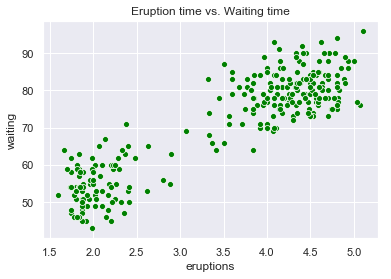

In [5]:
print("Problem 2a")
print("\n Based on the scatter plot, there seems to be a positive relation between eruption time and waiting time.")

x = np.asarray(df["eruptions"])
y = np.asarray(df["waiting"])
ax = sns.scatterplot(x = "eruptions", y = "waiting", color = "green", data = df)
ax.set_title("Eruption time vs. Waiting time")
plt.show()



Problem 2b

 Mean of eruption time is: 3.4877830882352936 
 Mean of waiting time is: 70.8970588235294


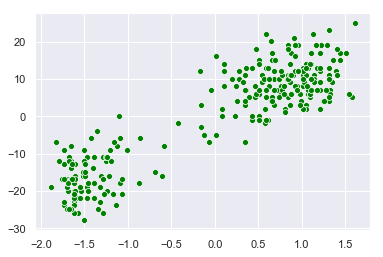

In [6]:
print("Problem 2b")
mean_x = np.mean(x)
mean_y = np.mean(y)
print("\n Mean of eruption time is:", mean_x, "\n Mean of waiting time is:", mean_y)
centered_x = x - mean_x
centered_y = y - mean_y

ax = sns.scatterplot(x = centered_x, y = centered_y, color = "green")
plt.show()

In [7]:
print("Problem 2c")
correlation = np.dot(centered_x, centered_y)/(la.norm(centered_x)*la.norm(centered_y))
print("Correlation between centered x and y is:", correlation)
print("The value of correlation matches my previous observation.")

Problem 2c
Correlation between centered x and y is: 0.9008111683218128
The value of correlation matches my previous observation.


Problem 2d
The intercept is 33.474397022753365
The slope is 10.729641395133523
The value of slope is value close to the value of correlation calculated earlier.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


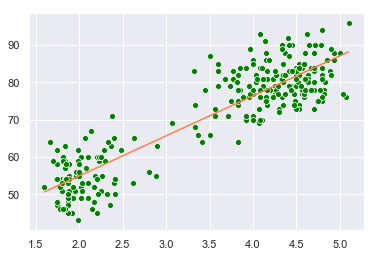

In [8]:
print("Problem 2d")

# Get the slope
b = np.dot(centered_x,centered_y)/(la.norm(centered_x)**2)
# Get the intercept
a = mean_y - b*mean_x


print("The intercept is",  a)
print("The slope is", b)
print("The value of slope is value close to the value of correlation calculated earlier.")
ax = sns.scatterplot(x, y, color = "green")
ax = sns.lineplot(x, a + b * x, color = "coral")
plt.show()

In [10]:
print("Problem 2e")
et = 2.2
expected_wt = a+b*et
print("Expected eruption time given a waiting time of 82 minutes is: %.3f minutes."%(expected_wt))


Problem 2e
Expected eruption time given a waiting time of 82 minutes is: 57.080 minutes.


In [11]:
print("Problem 2f")
epsilon = [y-(a+b*x)]
r_2 = 1- (la.norm(epsilon)**2)/(la.norm(centered_y)**2)
print("R^2 statistic is:",r_2)

Problem 2f
R^2 statistic is: 0.8114607609733097
